In [2]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import ConfusionMatrixDisplay , classification_report , confusion_matrix
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from category_encoders import OrdinalEncoder

In [3]:
# Read The data
df = pd.read_csv('/kaggle/input/mushroom-classification/mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
#Shape of the data
df.shape

(8124, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
df.select_dtypes('object').nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [7]:
#Drop low and high cardinality
df.drop(columns= ['bruises','gill-attachment','gill-spacing','gill-size','stalk-shape','veil-type'],inplace= True)

In [8]:
(df.isna().sum()) / len(df)

class                       0.0
cap-shape                   0.0
cap-surface                 0.0
cap-color                   0.0
odor                        0.0
gill-color                  0.0
stalk-root                  0.0
stalk-surface-above-ring    0.0
stalk-surface-below-ring    0.0
stalk-color-above-ring      0.0
stalk-color-below-ring      0.0
veil-color                  0.0
ring-number                 0.0
ring-type                   0.0
spore-print-color           0.0
population                  0.0
habitat                     0.0
dtype: float64

In [9]:
df

,class,cap-shape,cap-surface,cap-color,odor,gill-color,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,p,k,e,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,a,k,c,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,l,n,c,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,p,n,e,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,n,k,e,s,s,w,w,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,n,y,?,s,s,o,o,o,o,p,b,c,l
8120,e,x,s,n,n,y,?,s,s,o,o,n,o,p,b,v,l
8121,e,f,s,n,n,n,?,s,s,o,o,o,o,p,b,c,l
8122,p,k,y,n,y,b,?,s,k,w,w,w,o,e,w,v,l


In [10]:
df_habitat = df['habitat'].groupby(df['class']).value_counts(normalize= True).rename('frequency').to_frame().reset_index()
df_habitat

,class,habitat,frequency
0,e,d,0.446768
1,e,g,0.334601
2,e,m,0.060837
3,e,l,0.057034
4,e,w,0.045627
5,e,p,0.032319
6,e,u,0.022814
7,p,d,0.323800
8,p,p,0.257406
9,p,g,0.188968


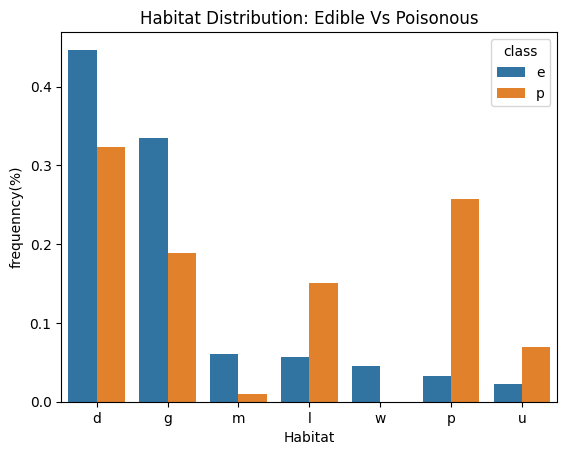

In [11]:
# Let`s create a bar plot to show the Habitat Distribution
sns.barplot(data = df_habitat,x='habitat',y='frequency',hue='class')
plt.xlabel('Habitat')
plt.ylabel('frequenncy(%)')
plt.title("Habitat Distribution: Edible Vs Poisonous");

In [12]:
df_popu = df['population'].groupby(df['class']).value_counts(normalize= True).rename('frequency').to_frame().reset_index()
df_popu

,class,population,frequency
0,e,v,0.283270
1,e,y,0.252852
2,e,s,0.209125
3,e,n,0.095057
4,e,a,0.091255
5,e,c,0.068441
6,p,v,0.727273
7,p,y,0.165475
8,p,s,0.093973
9,p,c,0.013279


In [13]:
## Let`s create a bar plot to show the population: Edible Vs Poisonous

fig = px.bar(data_frame= df_popu , x= 'population', y= 'frequency',color= 'class', barmode= 'group', title='population: Edible Vs Poisonous')
fig.update_layout(xaxis_title= 'population' , yaxis_title= 'frequenncy(%)')

In [14]:
#Define dictionary to replace the values ['n','o','t'] to [1 , 2 , Zero] to make it readable
ring_num = {
    'o': 1,
    't': 2,
    'n':0
}
ring_num

{'o': 1, 't': 2, 'n': 0}

In [15]:
df_ring = df['ring-number'].replace(ring_num).groupby(df['class']).value_counts(normalize= True).rename('frequency').to_frame().reset_index()
df_ring

,class,ring-number,frequency
0,e,1,0.874525
1,e,2,0.125475
2,p,1,0.972421
3,p,2,0.018386
4,p,0,0.009193


In [16]:
#Let`s create a barchart to visualize the number of rings in each class
fig = px.bar(data_frame= df_ring , x = 'ring-number' , y= 'frequency' , color = 'class' , barmode= 'group',title= 'Number of rings: Edible Vs Poisonous')
fig.update_layout(xaxis_title= 'number of rings' , yaxis_title = 'frequency (%)')

#### Split data

In [17]:
target = 'class'
X = df.drop(columns= [target])
y = df[target]

In [18]:
print(f'Y shape = {y.shape}')
print(f'X shape = {X.shape}')

Y shape = (8124,)
X shape = (8124, 16)


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
print(f'shape of X Train = {X_train.shape}')
print(f'shape of X Test = {X_test.shape}')
print(f'shape of Y Train = {y_train.shape}')
print(f'shape of Y Test = {y_test.shape}')

shape of X Train = (6499, 16)
shape of X Test = (1625, 16)
shape of Y Train = (6499,)
shape of Y Test = (1625,)


## Baseline

In [21]:
acc_baseline = y_train.value_counts(normalize= True).max()
print(f'Accuracy of baseline = {acc_baseline}')

Accuracy of baseline = 0.5177719649176796


## Iterate

In [22]:
clf = make_pipeline(OrdinalEncoder(),
                   RandomForestClassifier(random_state= 42))

In [23]:
params = {
    'randomforestclassifier__n_estimators': range(25,100,25),
    'randomforestclassifier__max_depth': range(10,70,10)
}
params

{'randomforestclassifier__n_estimators': range(25, 100, 25),
 'randomforestclassifier__max_depth': range(10, 70, 10)}

In [24]:
model = GridSearchCV(
    clf,
    param_grid= params,
    cv= 5,
    n_jobs= -1,
    verbose = 1
)
model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ordinalencoder', OrdinalEncoder()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 70, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25)},
             verbose=1)

In [25]:
model.fit(X_train , y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ordinalencoder', OrdinalEncoder()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 70, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25)},
             verbose=1)

In [26]:
cv_results = pd.DataFrame(model.cv_results_)
cv_results.sort_values(by= 'rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__max_depth,param_randomforestclassifier__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
8,0.651372,0.013565,0.069365,0.002279,30,75,"{'randomforestclassifier__max_depth': 30, 'ran...",1.0,1.0,1.000000,1.0,1.00000,1.000000,0.000000,1
15,0.346041,0.002726,0.055531,0.000699,60,25,"{'randomforestclassifier__max_depth': 60, 'ran...",1.0,1.0,1.000000,1.0,1.00000,1.000000,0.000000,1
14,0.650113,0.012883,0.069562,0.001031,50,75,"{'randomforestclassifier__max_depth': 50, 'ran...",1.0,1.0,1.000000,1.0,1.00000,1.000000,0.000000,1
13,0.499284,0.007887,0.062185,0.001404,50,50,"{'randomforestclassifier__max_depth': 50, 'ran...",1.0,1.0,1.000000,1.0,1.00000,1.000000,0.000000,1
12,0.352339,0.007470,0.056051,0.000336,50,25,"{'randomforestclassifier__max_depth': 50, 'ran...",1.0,1.0,1.000000,1.0,1.00000,1.000000,0.000000,1
11,0.634792,0.005285,0.068200,0.001571,40,75,"{'randomforestclassifier__max_depth': 40, 'ran...",1.0,1.0,1.000000,1.0,1.00000,1.000000,0.000000,1
10,0.496768,0.006108,0.062317,0.001183,40,50,"{'randomforestclassifier__max_depth': 40, 'ran...",1.0,1.0,1.000000,1.0,1.00000,1.000000,0.000000,1
9,0.354200,0.007049,0.059137,0.003932,40,25,"{'randomforestclassifier__max_depth': 40, 'ran...",1.0,1.0,1.000000,1.0,1.00000,1.000000,0.000000,1
17,0.814734,0.150586,0.068008,0.021501,60,75,"{'randomforestclassifier__max_depth': 60, 'ran...",1.0,1.0,1.000000,1.0,1.00000,1.000000,0.000000,1
7,0.536402,0.033606,0.063083,0.002240,30,50,"{'randomforestclassifier__max_depth': 30, 'ran...",1.0,1.0,1.000000,1.0,1.00000,1.000000,0.000000,1


#### Show best params

In [27]:
model.best_params_

{'randomforestclassifier__max_depth': 10,
 'randomforestclassifier__n_estimators': 50}

#### Show best Score of the model

In [28]:
model.best_score_

1.0

### Model Prediction

In [29]:
model.predict(X_test)

array(['e', 'p', 'p', ..., 'p', 'p', 'p'], dtype=object)

### ConfusionMatrix

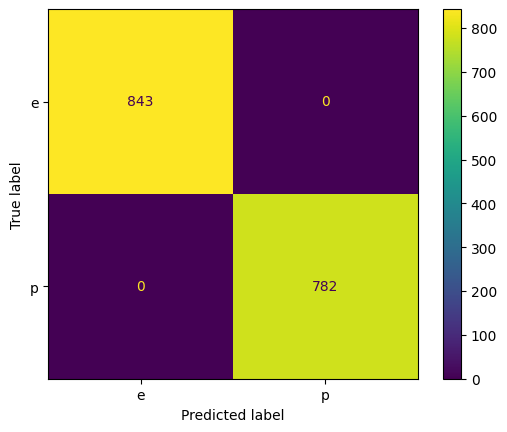

In [30]:
ConfusionMatrixDisplay.from_estimator(
    model ,
    X_test,
    y_test
);

### Classification report

In [31]:
print(classification_report(y_test , model.predict(X_test)));

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       843
           p       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



## Communication

In [32]:
features = X_test.columns
importances = model.best_estimator_.named_steps['randomforestclassifier'].feature_importances_

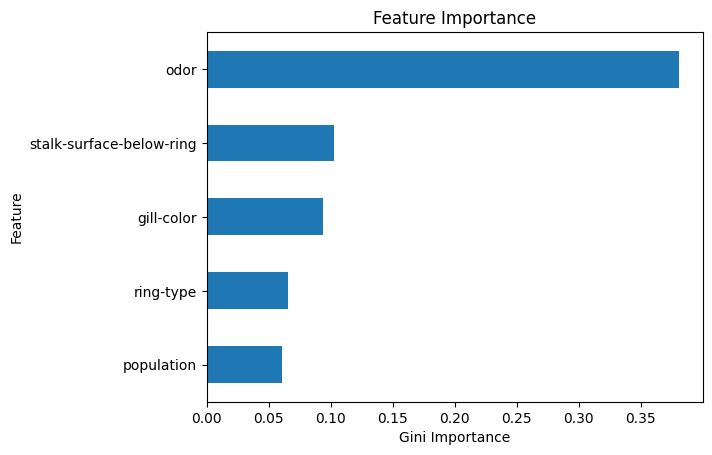

In [33]:
feat_imp = pd.Series(importances , index = features).sort_values()
feat_imp.tail().plot(kind= 'barh')
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");